Projet PPD, Binome:
  - Wacim BELAHCEL
  - Imad Oualid KACIMI

  
Sujet: Analyse de sentiment Yelp

# **lib set up**

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 34.8MB/s 
     |████████████████████████████████| 3.3MB 44.1MB/s 
     |████████████████████████████████| 901kB 39.0MB/s 


In [ ]:
!pip install tqdm

In [ ]:
!pip install nlp

     |████████████████████████████████| 1.7MB 21.1MB/s 
     |████████████████████████████████| 245kB 50.4MB/s 


In [ ]:
!pip install shap


     |████████████████████████████████| 358kB 22.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491613 sha256=44b00d04e3bdcfc45ead85075a7deb389e122172ccffbd79c6288bad8f7b80c0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


# **Import**

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
import shap

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [ ]:

seed_value = 1
import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



from nltk.tokenize import TweetTokenizer
  
tokenizer = TweetTokenizer()
  

In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import tqdm
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import pandas as pd
import re
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 
import json
from bs4 import BeautifulSoup
import unicodedata
from csv import writer
import nltk
import numpy as np
from nltk.corpus import wordnet
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

nltk.download('stopwords') 
nltk.download('punkt')
set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **used function**

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,60])
  plt.ylim([75,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')


In [ ]:
def underSampling(X,y,seed=123):
  rus = RandomUnderSampler(return_indices=True,random_state=seed)
  X_rus, y_rus, id_rus = rus.fit_sample(X, y)
  #print('Removed indexes:', id_rus)
  #plot_2d_space(X_rus, y_rus, 'Random under-sampling')

  return X_rus, y_rus, id_rus

def overSampling(X,y,seed=123):
  ros = RandomOverSampler(return_indices=True, random_state=seed)
  X_ros, y_ros, id_ros = ros.fit_sample(X, y)
  #print('Removed indexes:', id_ros)
  print(X_ros.shape[0] - X.shape[0], 'new random picked points')  

  return X_ros, y_ros, id_ros


def overAndunder(X,y,seed=123):
  rus = RandomUnderSampler(return_indices=True,random_state=seed, sampling_strategy=0.6)
  X_rus, y_rus, id_rus = rus.fit_sample(X,y)
  ros = RandomOverSampler(return_indices=True, random_state=seed)
  X_ros, y_ros, id_ros = ros.fit_sample(X_rus, y_rus)
  return X_ros, y_ros, id_ros
  

# **reloading the cleaned data set**
to mention that we use two different datasets, in fact it's the same dataset with a different level of cleaning, for log reg, svm and lstm we use the cleaned_data_yelp (highly processed)
and for bert we use a less agressive cleaning, the dataset is named cleaned_setence_embedding.csv

In [ ]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/yelp/cleaned_data_yelp.csv")
df_cleaned = df_cleaned.dropna()
df_cleaned["tokenized_text"] = df_cleaned["cleaned_text"].apply(lambda x : tokenizer.tokenize(x))

## **Split labels into negative and positive sentiment, also drop the neutral ones**

In [ ]:
df_cleaned.loc[df_cleaned["label"]<2,"label"]=0
df_cleaned.loc[df_cleaned["label"]>2,"label"]=1
df_cleaned = df_cleaned[df_cleaned["label"]!=2]


In [ ]:
df_cleaned.head(10)

,business_is,label,text,cleaned_text,tokenized_text
0,uo8kklLY1LK9mh11BPwywQ,1,"We stopped by here on a Saturday night, and th...",stop night place full small restaurant fortuna...,"[stop, night, place, full, small, restaurant, ..."
1,lYy9T8B4al08kHXSDuUZjQ,1,My favourite lunch place in the area. Big port...,favourite lunch place area big portion good pr...,"[favourite, lunch, place, area, big, portion, ..."
2,AJOiPJPEei53qh94tG3jFw,0,My girlfriends and I didn't go back to this re...,girlfriend n go back restaurant renovate find ...,"[girlfriend, n, go, back, restaurant, renovate..."
3,VGq9wu_ZtvonP1Rke4CxYw,1,Really good XLB - delicate yet structurally in...,true good delicate yet structural intact rich ...,"[true, good, delicate, yet, structural, intact..."
4,Nk5Hsw1SlRF6I1HcY5EGdA,1,I have been coming here for years. the waffle...,come year waffle awesome quality year year own...,"[come, year, waffle, awesome, quality, year, y..."
5,sNDfYZP9OYypywbi33aSxw,0,The food tasted good. The waitress who took th...,food taste good waitress take order try excess...,"[food, taste, good, waitress, take, order, try..."
6,9yZpfG9uP0DjDHSUQokfvw,1,Kongee Dinesty has one of the best congee (ric...,one best congee rice porridge town menu kept s...,"[one, best, congee, rice, porridge, town, menu..."
9,s8GuNWKlwunSdDnz84iyPw,0,Chicken was raw.\nBrisket was dry and tough.\n...,raw dry tough remedy many food choice richmond...,"[raw, dry, tough, remedy, many, food, choice, ..."
11,9yZpfG9uP0DjDHSUQokfvw,1,Came here for some Chinese breakfast because i...,came chinese breakfast close airport specialty...,"[came, chinese, breakfast, close, airport, spe..."
12,AJOiPJPEei53qh94tG3jFw,0,There is a 20% discount if you put down your o...,discount put order 11am prompt miss minute hig...,"[discount, put, order, 11am, prompt, miss, min..."


In [ ]:
df_cleaned.groupby("label").count()

,business_is,text,cleaned_text,tokenized_text
label,,,,
0,9694,9694,9694,9694
1,22577,22577,22577,22577


## **spliting the data set into train and test**

In [ ]:
final_y = df_cleaned.label
final_data_x = df_cleaned[["business_is", "text", "cleaned_text","tokenized_text"]]
X_train_enc,X_test_enc,y_train_enc,y_test_enc = train_test_split(final_data_x,final_y, test_size=0.2,random_state=101)
#X_train_enc,X_val_enc,y_train_enc,y_val_enc = train_test_split(X_train_enc,y_train_enc, test_size=0.2,random_state=101)

## **apply oversampling, undersampling and hybrid**

In [ ]:
X_ros_enc, y_ros_enc, _= overSampling(X_train_enc,y_train_enc)

X_rus_enc, y_rus_enc, _=  underSampling(X_train_enc,y_train_enc)
X_rus_enc, y_rus_enc = shuffle(X_rus_enc, y_rus_enc, random_state=0)


X_rusros_enc, y_rusros_enc, _=  overAndunder(X_train_enc,y_train_enc)
X_rusros_enc, y_rusros_enc = shuffle(X_rusros_enc, y_rusros_enc, random_state=0)



10318 new random picked points


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## **doc2vec**

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_data_x["tokenized_text"].tolist())]
model = Doc2Vec(documents, vector_size=64, window=2, min_count=1, workers=4)

In [ ]:
X_ros_vecs = [model.infer_vector(sent) for sent in X_ros_enc[:,3]] 
X_ros_vecs = np.asarray(X_ros_vecs)

In [ ]:
X_rus_vecs = [model.infer_vector(sent) for sent in X_rus_enc[:,3]] 
X_rus_vecs = np.asarray(X_rus_vecs)

In [ ]:

X_rusros_vecs = [model.infer_vector(sent) for sent in X_rusros_enc[:,3]] 
X_rusros_vecs = np.asarray(X_rusros_vecs)

In [ ]:
X_test_vecs = [model.infer_vector(sent) for sent in X_test_enc["tokenized_text"].tolist()] 
X_test_vecs = np.asarray(X_test_vecs)

In [ ]:
unique, counts = np.unique(y_train_enc, return_counts=True)
dict(zip(unique, counts))

{0: 7749, 1: 18067}

In [ ]:
unique, counts = np.unique(y_rus_enc, return_counts=True)
dict(zip(unique, counts))

{0: 7749, 1: 7749}

In [ ]:
unique, counts = np.unique(y_ros_enc, return_counts=True)
dict(zip(unique, counts))

{0: 18067, 1: 18067}

In [ ]:
unique, counts = np.unique(y_test_enc, return_counts=True)
dict(zip(unique, counts))

{0: 1945, 1: 4510}

# **Logistic regression**

## **oversampling**

In [ ]:

penalty = 'l2'
C = 0.1
solver = 'sag'
class_weight = 'balanced'
modeltype = 'logreg'
params = (str(modeltype) + '_' +
          str(penalty) + '_' + 
          str(C) + '_' + 
          str(solver) + '_' + 
          str(class_weight))
lr_model = LogisticRegression(penalty = penalty,
                           C = C,
                           solver = solver,
                           multi_class = 'auto',
                           class_weight = class_weight,
                           random_state = 1337)

In [ ]:
lr_model.fit(X_ros_vecs, y_ros_enc)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1337, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr_model.predict(X_test_vecs)

In [ ]:
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1945
           1       0.92      0.86      0.89      4510

    accuracy                           0.85      6455
   macro avg       0.81      0.84      0.82      6455
weighted avg       0.85      0.85      0.85      6455



In [ ]:
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1945
           1       0.91      0.86      0.88      4510

    accuracy                           0.84      6455
   macro avg       0.81      0.83      0.82      6455
weighted avg       0.85      0.84      0.85      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.8377869230900769


## **undersampling**

In [ ]:

penalty = 'l2'
C = 0.1
solver = 'sag'
class_weight = 'balanced'
modeltype = 'logreg'
params = (str(modeltype) + '_' +
          str(penalty) + '_' + 
          str(C) + '_' + 
          str(solver) + '_' + 
          str(class_weight))
lr_model = LogisticRegression(penalty = penalty,
                           C = C,
                           solver = solver,
                           multi_class = 'auto',
                           class_weight = class_weight,
                           random_state = 1337)

In [ ]:
lr_model.fit(X_rus_vecs, y_rus_enc)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1337, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr_model.predict(X_test_vecs)

In [ ]:
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1945
           1       0.91      0.86      0.88      4510

    accuracy                           0.84      6455
   macro avg       0.81      0.83      0.82      6455
weighted avg       0.85      0.84      0.85      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.8344096808577339


## **hybrid**

In [ ]:

penalty = 'l2'
C = 0.1
solver = 'sag'
class_weight = 'balanced'
modeltype = 'logreg'
params = (str(modeltype) + '_' +
          str(penalty) + '_' + 
          str(C) + '_' + 
          str(solver) + '_' + 
          str(class_weight))
lr_model = LogisticRegression(penalty = penalty,
                           C = C,
                           solver = solver,
                           multi_class = 'auto',
                           class_weight = class_weight,
                           random_state = 1337)

In [ ]:
lr_model.fit(X_rusros_vecs, y_rusros_enc)


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1337, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr_model.predict(X_test_vecs)

In [ ]:
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1945
           1       0.91      0.86      0.89      4510

    accuracy                           0.85      6455
   macro avg       0.81      0.84      0.82      6455
weighted avg       0.85      0.85      0.85      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.8361738268001984


# **SVM**

## **oversampling**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

c_values =   [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4]
gamma_set =  [3e-06 ,0.00001, 0.0001, 0.0003,0.001, 0.01, 0.1, 1]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, gamma=gamma_set, kernel=kernel_values)
svm = SVC(random_state=0)
clf = RandomizedSearchCV(estimator=svm, param_distributions=param_grid,n_iter = 20, verbose=2)
clf.fit(X_ros_vecs, y_ros_enc)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] kernel=linear, gamma=1, C=3.2 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... kernel=linear, gamma=1, C=3.2, total=  34.5s
[CV] kernel=linear, gamma=1, C=3.2 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.5s remaining:    0.0s


[CV] .................... kernel=linear, gamma=1, C=3.2, total=  33.1s
[CV] kernel=linear, gamma=1, C=3.2 ...................................
[CV] .................... kernel=linear, gamma=1, C=3.2, total=  32.6s
[CV] kernel=linear, gamma=1, C=3.2 ...................................
[CV] .................... kernel=linear, gamma=1, C=3.2, total=  33.2s
[CV] kernel=linear, gamma=1, C=3.2 ...................................
[CV] .................... kernel=linear, gamma=1, C=3.2, total=  32.6s
[CV] kernel=rbf, gamma=1e-05, C=1.6 ..................................
[CV] ................... kernel=rbf, gamma=1e-05, C=1.6, total= 1.2min
[CV] kernel=rbf, gamma=1e-05, C=1.6 ..................................
[CV] ................... kernel=rbf, gamma=1e-05, C=1.6, total= 1.2min
[CV] kernel=rbf, gamma=1e-05, C=1.6 ..................................
[CV] ................... kernel=rbf, gamma=1e-05, C=1.6, total= 1.2min
[CV] kernel=rbf, gamma=1e-05, C=1.6 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 87.6min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=0,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.4, 0.8, 1.6, 3.2,
                                              6.4],
                                        'gamma': [3e-06, 1e-05, 0.0001, 0.0003,
                                                  0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', 

In [ ]:
clf.best_estimator_

SVC(C=6.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:

clf = SVC(C=6.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(X_ros_vecs, y_ros_enc)
y_pred = clf.predict(X_test_vecs)
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1945
           1       0.92      0.86      0.89      4510

    accuracy                           0.85      6455
   macro avg       0.81      0.84      0.82      6455
weighted avg       0.85      0.85      0.85      6455



In [ ]:

clf = SVC(C=6.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(X_ros_vecs, y_ros_enc)
y_pred = clf.predict(X_test_vecs)
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1945
           1       0.91      0.86      0.88      4510

    accuracy                           0.84      6455
   macro avg       0.81      0.83      0.82      6455
weighted avg       0.85      0.84      0.85      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.8373483090988891


## **undersampling**

In [ ]:

clf = SVC(C=6.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(X_rus_vecs, y_rus_enc)
y_pred = clf.predict(X_test_vecs)
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1945
           1       0.91      0.86      0.89      4510

    accuracy                           0.85      6455
   macro avg       0.81      0.84      0.82      6455
weighted avg       0.85      0.85      0.85      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.8356340380417127


## **hybrid**

In [ ]:

clf = SVC(C=6.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(X_rusros_vecs, y_rusros_enc)
y_pred = clf.predict(X_test_vecs)
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1945
           1       0.91      0.86      0.89      4510

    accuracy                           0.85      6455
   macro avg       0.81      0.84      0.82      6455
weighted avg       0.85      0.85      0.85      6455



In [ ]:

clf = SVC(C=6.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(X_rusros_vecs, y_rusros_enc)
y_pred = clf.predict(X_test_vecs)
print(classification_report(y_test_enc.values,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1945
           1       0.91      0.86      0.89      4510

    accuracy                           0.84      6455
   macro avg       0.81      0.83      0.82      6455
weighted avg       0.85      0.84      0.85      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.8369450350264194


# **LSTM**

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.optimizers import Adam,RMSprop
from keras.utils.vis_utils import plot_model

from keras.preprocessing.text import Tokenizer


## **oversampling**

In [ ]:
max_words = 1800
max_len = 220
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_ros_enc[:,2])
sequences = tok.texts_to_sequences(X_ros_enc[:,2])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(X_test_enc["cleaned_text"].tolist())
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,64,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 220)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 220, 64)           115200    
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               98816     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

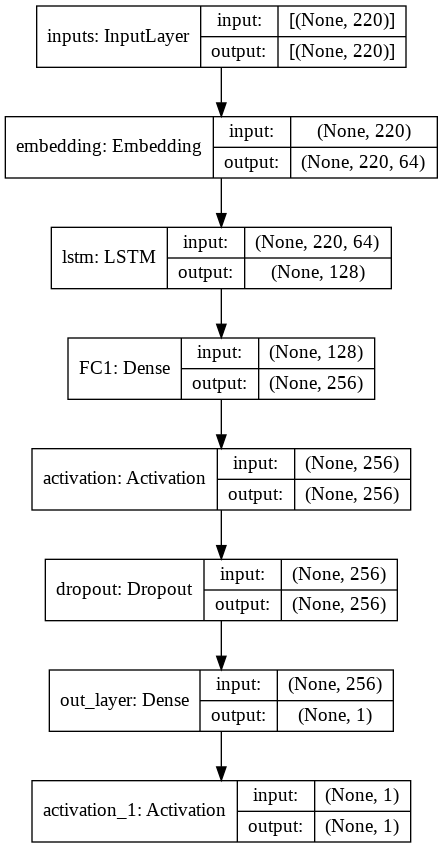

In [ ]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(sequences_matrix,y_ros_enc,batch_size=128,epochs=10,
          validation_split=0.2)

Epoch 1/10
226/226 [==============================] - 7s 23ms/step - loss: 0.4533 - accuracy: 0.7871 - val_loss: 0.3875 - val_accuracy: 0.8522
Epoch 2/10
226/226 [==============================] - 5s 21ms/step - loss: 0.2086 - accuracy: 0.9215 - val_loss: 0.2566 - val_accuracy: 0.8900
Epoch 3/10
226/226 [==============================] - 5s 21ms/step - loss: 0.1895 - accuracy: 0.9298 - val_loss: 0.1751 - val_accuracy: 0.9304
Epoch 4/10
226/226 [==============================] - 5s 21ms/step - loss: 0.1696 - accuracy: 0.9364 - val_loss: 0.2995 - val_accuracy: 0.8975
Epoch 5/10
226/226 [==============================] - 5s 21ms/step - loss: 0.1488 - accuracy: 0.9445 - val_loss: 0.1774 - val_accuracy: 0.9314
Epoch 6/10
226/226 [==============================] - 5s 21ms/step - loss: 0.1394 - accuracy: 0.9486 - val_loss: 0.1903 - val_accuracy: 0.9203
Epoch 7/10
226/226 [==============================] - 5s 22ms/step - loss: 0.1221 - accuracy: 0.9547 - val_loss: 0.1629 - val_accuracy: 0.9354

In [ ]:
y_pred = model.predict(test_sequences_matrix)

In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1945
           1       0.93      0.95      0.94      4510

    accuracy                           0.92      6455
   macro avg       0.91      0.90      0.90      6455
weighted avg       0.92      0.92      0.92      6455



In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1945
           1       0.94      0.94      0.94      4510

    accuracy                           0.91      6455
   macro avg       0.90      0.90      0.90      6455
weighted avg       0.91      0.91      0.91      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.9646886382161322


## **undersampling**

In [ ]:
max_words = 1800
max_len = 220
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_rus_enc[:,2])
sequences = tok.texts_to_sequences(X_rus_enc[:,2])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(X_test_enc["cleaned_text"].tolist())
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 220)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 220, 64)           115200    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               98816     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [ ]:
model.fit(sequences_matrix,y_rus_enc,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
97/97 [==============================] - 4s 27ms/step - loss: 0.5706 - accuracy: 0.6998 - val_loss: 0.3766 - val_accuracy: 0.8332
Epoch 2/10
97/97 [==============================] - 2s 22ms/step - loss: 0.3956 - accuracy: 0.8873 - val_loss: 0.2510 - val_accuracy: 0.8961
Epoch 3/10
97/97 [==============================] - 2s 22ms/step - loss: 0.2049 - accuracy: 0.9248 - val_loss: 0.2449 - val_accuracy: 0.9032
Epoch 4/10
97/97 [==============================] - 2s 22ms/step - loss: 0.1897 - accuracy: 0.9257 - val_loss: 0.2525 - val_accuracy: 0.8968


In [ ]:
y_pred = model.predict(test_sequences_matrix)

In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1945
           1       0.97      0.84      0.90      4510

    accuracy                           0.88      6455
   macro avg       0.85      0.90      0.86      6455
weighted avg       0.90      0.88      0.88      6455



In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1945
           1       0.97      0.87      0.92      4510

    accuracy                           0.89      6455
   macro avg       0.86      0.91      0.88      6455
weighted avg       0.91      0.89      0.89      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.9702174544998546


## **hybrid**

In [ ]:
max_words = 1800
max_len = 220
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_rusros_enc[:,2])
sequences = tok.texts_to_sequences(X_rusros_enc[:,2])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
test_sequences = tok.texts_to_sequences(X_test_enc["cleaned_text"].tolist())
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 220)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 220, 64)           115200    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [ ]:
model.fit(sequences_matrix,y_rusros_enc,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
162/162 [==============================] - 6s 24ms/step - loss: 0.4986 - accuracy: 0.7676 - val_loss: 0.2831 - val_accuracy: 0.8864
Epoch 2/10
162/162 [==============================] - 3s 22ms/step - loss: 0.2221 - accuracy: 0.9178 - val_loss: 0.2374 - val_accuracy: 0.9129
Epoch 3/10
162/162 [==============================] - 3s 21ms/step - loss: 0.1899 - accuracy: 0.9279 - val_loss: 0.2394 - val_accuracy: 0.9110


In [ ]:
y_pred = model.predict(test_sequences_matrix)

In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1945
           1       0.94      0.95      0.94      4510

    accuracy                           0.92      6455
   macro avg       0.91      0.90      0.90      6455
weighted avg       0.92      0.92      0.92      6455



In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1945
           1       0.94      0.95      0.94      4510

    accuracy                           0.92      6455
   macro avg       0.91      0.90      0.91      6455
weighted avg       0.92      0.92      0.92      6455



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, y_pred)
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.9665170230108471


# **Bert**

## **load the concerened data set with low level cleaning**

In [ ]:
df_cleaned = pd.read_csv("/content/drive/MyDrive/yelp/cleaned_setence_embedding.csv")

number of y == 1 :  22628
number of y == 0 :  9714


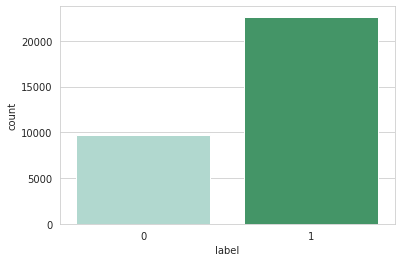

In [ ]:
print("number of y == 1 : ", str(len(df_cleaned[df_cleaned["label"] == 1])))
print("number of y == 0 : ", str(len(df_cleaned[df_cleaned["label"] == 0])))
sns.set_style('whitegrid')
sns.countplot(x='label',data=df_cleaned,palette='BuGn')

In [ ]:
df_cleaned

,business_id,label,text,cleaned_text
0,uo8kklLY1LK9mh11BPwywQ,1,"We stopped by here on a Saturday night, and th...","We stopped by here on a Saturday night, and th..."
1,lYy9T8B4al08kHXSDuUZjQ,1,My favourite lunch place in the area. Big port...,My favourite lunch place in the area. Big port...
2,AJOiPJPEei53qh94tG3jFw,0,My girlfriends and I didn't go back to this re...,My girlfriends and I didn't go back to this re...
3,VGq9wu_ZtvonP1Rke4CxYw,1,Really good XLB - delicate yet structurally in...,Really good XLB - delicate yet structurally in...
4,Nk5Hsw1SlRF6I1HcY5EGdA,1,I have been coming here for years. the waffle...,I have been coming here for years. the waffle...
...,...,...,...,...
32337,1-xKhuOi7QbImoZ7l3-P6A,1,It's amazing how stuffed you can get here for ...,It's amazing how stuffed you can get here for ...
32338,YWKrD8E6UDK0A9P8E_O7nQ,0,Customer service: Good and welcoming \n顧客服務: 贊...,Customer service: Good and welcoming \n: \n\nF...
32339,_8xxaR-LEaEOiiml_U0OLQ,1,A really lovely place. I like to order the Ben...,A really lovely place. I like to order the Ben...
32340,x9RA_NPjcvQ8-EU28ppBqA,1,This place is never a disappointment for pizza...,This place is never a disappointment for pizza...


## **Split the data into train, validation and test set**

In [ ]:
final_y = df_cleaned.label
final_data_x = df_cleaned[["business_id", "text", "cleaned_text"]]
X_train_enc,X_test_enc,y_train_enc,y_test_enc = train_test_split(final_data_x,final_y, test_size=0.2,random_state=101)
X_train_enc,X_val_enc,y_train_enc,y_val_enc = train_test_split(X_train_enc,y_train_enc, test_size=0.2,random_state=101)

In [ ]:
df_X_train_enc = pd.DataFrame(X_train_enc, columns=["business_id","text", "cleaned_text"])

In [ ]:
df_X_train_enc["label"] = y_train_enc

## **get the number average number of wer per sentence**

I've been to Ikea many times and been thrilled with their furniture, accessories, knick-knacks, etc. - things that I could bring home myself. Indeed, as I write this, I am sitting at a little desk from Ikea, drinking wine out of a glass from Ikea. So, given my positive experience, I decided to buy a mattress and box spring from Ikea - something that would need to be delivered.

I went to Ikea having done my research and narrowed my decision down to two mattresses. I went alone, thinking that customer service would be able to help me if needed.

Here's where it went wrong:

-The woman in the mattress section told me delivery cost $  for the mattress I was buying. It was $ .
-To purchase the mattress, I had to put it on a cart and bring it through the till. Not a big deal, but there was only one of me, so I needed help getting the mattress on the cart. The guy working in the furniture "self-serve" section was blatantly pissed off about having to help me, and told me to "wait over there" 

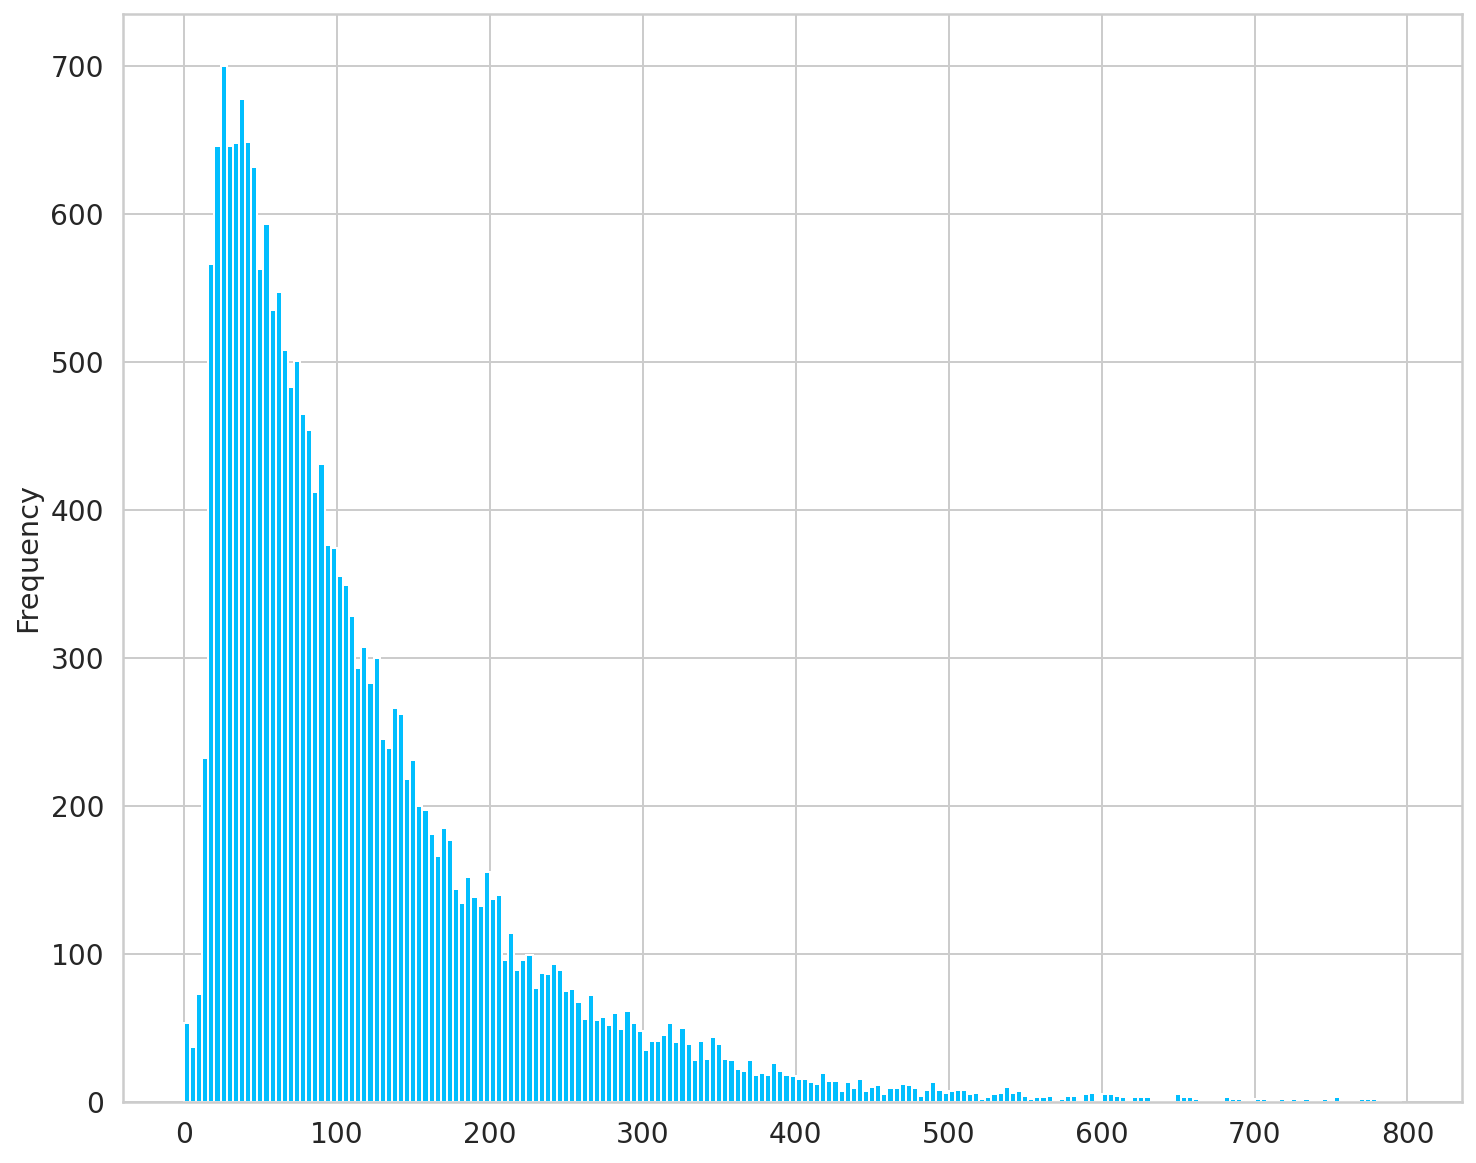

In [ ]:
def num_word(sentences): 
  word_sum = 0
  for word in sentences.split(" "):
    if word:
      word_sum += 1
  if word_sum > 500:
    print(sentences)
  return word_sum

words_df = df_X_train_enc["cleaned_text"].apply(lambda x: num_word(x))
words_df.plot(kind='hist', bins = [x*4 for x in range(200)], fontsize=14, figsize=(12,10))
print(np.average(words_df))


## **bert model**

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


In [ ]:
class YelpDataset(Dataset):
  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
def create_data_loader(X,Y, tokenizer, max_len, batch_size):
  ds = YelpDataset(
    reviews=X[:,2],
    targets=Y,
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class SentimentClassifierBert(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifierBert, self).__init__()
    self.bert = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=n_classes, output_attentions=False, output_hidden_states=False)

  def forward(self, input_ids, attention_mask, labels, token_type_ids=None):
    
    return self.bert(input_ids=input_ids, attention_mask=attention_mask, labels=labels, token_type_ids=token_type_ids)

def get_training_modules(model, total_steps):
  """
  Gets modules needed for model training
  :param model: Model to train
  :param total_steps (int): Number of training steps (dataloader length X nb epochs)
  :return :  optimizer, scheduler, loss function, tokenizer
  """
  optimizer = AdamW(model.parameters(), lr=2e-5, eps = 1e-8)
  scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0, #recommended by bert paper
    num_training_steps=total_steps
  )
  loss_fn = nn.CrossEntropyLoss().to(device)
  return optimizer, scheduler, loss_fn



In [ ]:
def train_epoch(
        model,
        data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        n_examples
):
  """
  Trains the model on one epoch
  :param model: Pretrained model
  :param data_loader: GPReviewDataset Training dataloader
  :param loss_fn: Loss function 
  :param optimize: Optimizer
  :param device (str): Device on with run the training ("cuda:0" or "cpu")
  :param scheduler: Scheduler
  :param n_examples (int): Length of the training dataset
  :return: Training accuracy and training loss for the epoch
  """
  model = model.train()
  losses = []
  correct_predictions = 0

  for d in tqdm.tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask,
      labels=targets,
      token_type_ids=None
    )
    _, pred = torch.max(outputs[1], dim=1)

    loss = outputs[0]
    
    #total_loss += loss.item()

    correct_predictions += torch.sum(pred == targets)
    losses.append(loss.item())

    loss.backward()
    # gradient clipping to remove exploding gradient (grad so large)
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions/n_examples, np.mean(losses)


def eval_model(model, data_loader, loss_fn, device, n_examples):
  """
  Evaluates the model performance
  :param model: Trained model
  :param data_loader: GPReviewDataset Validation dataloader
  :param loss_fn: Loss function 
  :param device (str): Device on with run the training ("cuda:0" or "cpu")
  :param n_examples (int): Length of the validation dataset
  :return: Validation accuracy and validation loss on the dataset
  """
  model = model.eval()
  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in tqdm.tqdm(data_loader):
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=targets,
        token_type_ids=None
      )
      _, pred = torch.max(outputs[1], dim=1)
      loss = outputs[0]

      #loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(pred == targets)
      losses.append(loss.item())
  print(correct_predictions.double() / n_examples)
  return correct_predictions.double() / n_examples, np.mean(losses)


def run_training(model,train_data_loader, train_n_example, val_data_loader, val_n_example, BATCH_SIZE, PRE_TRAINED_MODEL_NAME, EPOCHS, loss_fn, optimizer, device, scheduler, curr_epoc=0):
  """
  Trains model
  :param model: Model to train
  :param train_data_loader: Training dataloader
  :param val_data_loader: Validation dataloader
  :param BATCH_SIZE (int): Batch size
  :param PRE_TRAINED_MODEL_NAME (str): Name of the pretrained model for tokenizer
  :param EPOCHS (int): number of epochs
  :param loss_fn: Loss Function
  :param optimizer: Optimizer
  :param device: Device (CPU vs GPU)
  :param scheduler: Model scheduler
  """
  history = defaultdict(list)
  best_accuracy = 0
  
  for epoch in range(curr_epoc, EPOCHS + 1):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    train_acc, train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      train_n_example
    )
    print(f'Train loss {train_loss}')
 
    val_acc, val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      val_n_example
    )
    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()
    # store into history
    history['train_acc'].append(float(train_acc))
    history['train_loss'].append(float(train_loss))
    history['val_acc'].append(float(val_acc))
    history['val_loss'].append(float(val_loss))
    
    # store the model with the best val acc
    if val_acc > best_accuracy:
      torch.save(model.state_dict(), "/content/drive/MyDrive/yelp/model_over_sampling/model_"+ str(curr_epoc))

      best_accuracy = val_acc
      history["best_accuracy"]=best_accuracy
      history["best_epoch"]=curr_epoc


def get_predictions(model, data_loader):
  """
  Runs model prediction on a dataset
  :param model: Trained model
  :param data_loader: GPReviewDataset Dataloader for predict
  :return: Original content, Class prediction {1,2,3}, Probabilities for each class, Ground truth
  """
  model = model.eval()
  review_texts=[]
  predictions=[]
  prediction_probs=[]
  real_values = []
  with torch.no_grad():
    for d in tqdm.tqdm(data_loader) :
      text = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=targets,
        token_type_ids=None
      )
      _, pred = torch.max(outputs[1], dim=1)
      loss = outputs[0]
      review_texts.extend(text)
      predictions.extend(pred)
      prediction_probs.extend(outputs[1])
      real_values.extend(targets)
  #convert list of tensors to a single tensor
  predictions = torch.stack(predictions).to(device)
  prediction_probs = torch.stack(prediction_probs).to(device)
  real_values = torch.stack(real_values).to(device)

  return review_texts, predictions, prediction_probs, real_values


def show_confusion_matrix(confusion_matrix):
  """
  Display the confusion matrix
  :param confusion_matrix: Confusion Matrix
  """
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

  
def classify_comments(model, data_loader,class_names):
  """
  Classify sentiment for comments
  :param model: Trained model
  :param dataloader: DataLoader to predict
  :param class_names (List(str)): Names of classes
  :return: DataFrame with columns "Text"(original text), "target" (GT sentiment), "pred" (sentiment predicted), and "probs" (probabilities for each class) 
  """
  y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model, data_loader)
  res = pd.DataFrame(zip(y_review_texts, y_test.tolist(),y_pred.tolist(),y_pred_probs.tolist()), columns=["Text", "target", "pred", "probs"])

  res.target = res.target.apply(lambda x: class_names[x])
  res.pred = res.pred.apply(lambda x: class_names[x])
  return res

### **Oversampling**

In [ ]:
X_ros_enc, y_ros_enc, _= overSampling(X_train_enc,y_train_enc)

In [ ]:
BATCH_SIZE = 16
MAX_LEN = 256
EPOCHS = 5
train_data_loader = create_data_loader(X_ros_enc, y_ros_enc, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val_enc.values,y_val_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test_enc.values,y_test_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
model = SentimentClassifierBert(2)
model = model.to(device)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
optimizer, scheduler, loss_fn = get_training_modules(model, len(train_data_loader)*EPOCHS)
run_training(model,train_data_loader, len(X_ros_enc), val_data_loader, len(X_val_enc), BATCH_SIZE, PRE_TRAINED_MODEL_NAME, EPOCHS, loss_fn, optimizer, device, scheduler, curr_epoc=0)

  0%|          | 0/1810 [00:00<?, ?it/s]

Epoch 1/5
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/py

Train loss 0.14623579273885695


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

tensor(0.3996, device='cuda:0', dtype=torch.float64)
Val   loss 4.648835213831913 accuracy 0.3996135265700483



  0%|          | 0/1810 [00:00<?, ?it/s]

Epoch 2/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.08031239159795078


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

tensor(0.5001, device='cuda:0', dtype=torch.float64)
Val   loss 4.111295722884896 accuracy 0.5000966183574879



  0%|          | 0/1810 [00:00<?, ?it/s]

Epoch 3/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.046746370863109614


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

tensor(0.5714, device='cuda:0', dtype=torch.float64)
Val   loss 2.817984050990623 accuracy 0.5714009661835748



  0%|          | 0/1810 [00:00<?, ?it/s]

Epoch 4/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.02609881364621805


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

tensor(0.9229, device='cuda:0', dtype=torch.float64)
Val   loss 0.5041667644460334 accuracy 0.9228985507246377



  0%|          | 0/1810 [00:00<?, ?it/s]

Epoch 5/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.00820435667797003


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

tensor(0.9594, device='cuda:0', dtype=torch.float64)
Val   loss 0.27801631504011043 accuracy 0.9594202898550724



  0%|          | 0/1810 [00:00<?, ?it/s]

Epoch 6/5
----------


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

Train loss 0.005358175985731869


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input si

tensor(0.9594, device='cuda:0', dtype=torch.float64)
Val   loss 0.27801631504011043 accuracy 0.9594202898550724



In [ ]:
torch.save(model, "/content/drive/MyDrive/yelp/model_over_sampling/last/model_last")

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/yelp/model_over_sampling/last/model_last_state_dict")

In [ ]:
eval_model(model, test_data_loader, loss_fn, device, len(X_test_enc),)

  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Be

tensor(0.9597, device='cuda:0', dtype=torch.float64)


(tensor(0.9597, device='cuda:0', dtype=torch.float64), 0.2747002908981094)

In [ ]:
review_texts, predictions, prediction_probs, real_values=get_predictions(model, test_data_loader)



  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for B

In [ ]:
test_data_loader.dataset.reviews

array(["My co-worker suggested to try Kumare. I did. I'm not impress about the food but the service was polite and nice",
       'Since they introduce those self ordering machine, the service is very poor, I was literally ignored standing at the cashier for like   minutes I finally ask the guys cleaning the coffee machine are you going to take my Oder, he reply we are using the machines now,I said no I am not using self serve machine, there was   employees standing beside only   machine, and   customers like me that refuse the machine',
       "really fresh and yummy sashimi and sushi for very reasonable price! :)\n\nwe were on vaca in vancouver and found this restaurant on yelp, i was craving sushi after a week of bad meals that we had during a tour of the canadian rockies.\n\nwe had the $  speical set dinner n' it was amazing!! it include   appetizers, sake, a whole lobster sashimi, salmon, scallop sashimi, grilled lobster claws, lobster soup, ishiyaki beef, n' sesame ice cream. the 

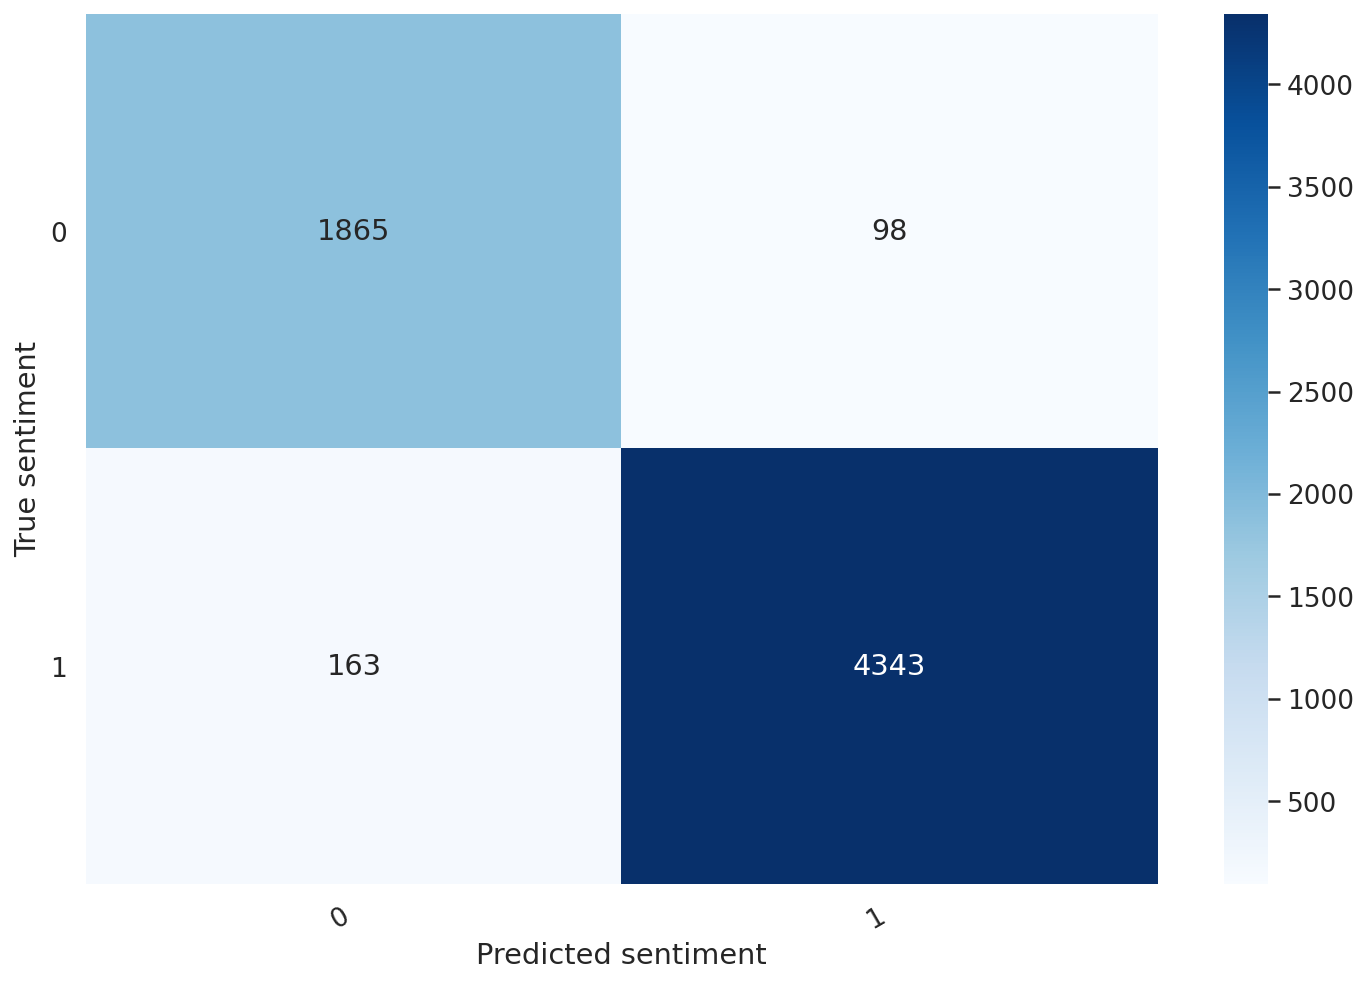

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_enc, predictions.tolist())
show_confusion_matrix(cm)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, predictions.tolist()))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1963
           1       0.98      0.96      0.97      4506

    accuracy                           0.96      6469
   macro avg       0.95      0.96      0.95      6469
weighted avg       0.96      0.96      0.96      6469



In [ ]:

fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, predictions.tolist())
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.9569512117086653


### **Undersampling**

In [ ]:
X_rus_enc, y_rus_enc, _=  underSampling(X_train_enc,y_train_enc)
from sklearn.utils import shuffle
X_rus_enc, y_rus_enc = shuffle(X_rus_enc, y_rus_enc, random_state=0)

In [ ]:
BATCH_SIZE = 16
MAX_LEN = 256
EPOCHS = 5
train_data_loader = create_data_loader(X_rus_enc, y_rus_enc, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val_enc.values,y_val_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test_enc.values,y_test_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
model = SentimentClassifierBert(2)
model = model.to(device)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
optimizer, scheduler, loss_fn = get_training_modules(model, len(train_data_loader)*EPOCHS)
run_training(model,train_data_loader, len(X_rus_enc), val_data_loader, len(X_val_enc), BATCH_SIZE, PRE_TRAINED_MODEL_NAME, EPOCHS, loss_fn, optimizer, device, scheduler, curr_epoc=0)

  0%|          | 0/778 [00:00<?, ?it/s]

Epoch 1/5
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a

Train loss 0.21465034685235299


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9590, device='cuda:0', dtype=torch.float64)
Val   loss 0.1694374023717512 accuracy 0.9590338164251208



  0%|          | 0/778 [00:00<?, ?it/s]

Epoch 2/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss 0.09780960189595167


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9594, device='cuda:0', dtype=torch.float64)
Val   loss 0.17351703264572324 accuracy 0.9594202898550724



  0%|          | 0/778 [00:00<?, ?it/s]

Epoch 3/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.04245055953070197


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9557, device='cuda:0', dtype=torch.float64)
Val   loss 0.23468809276195832 accuracy 0.9557487922705313

Epoch 4/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.020424366240236046


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

tensor(0.9554, device='cuda:0', dtype=torch.float64)
Val   loss 0.27316077559347224 accuracy 0.9553623188405796

Epoch 5/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.010097447648907205


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9552, device='cuda:0', dtype=torch.float64)
Val   loss 0.29284684481565 accuracy 0.9551690821256038

Epoch 6/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.006117954413012789


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9552, device='cuda:0', dtype=torch.float64)
Val   loss 0.29284684481565 accuracy 0.9551690821256038



In [ ]:
torch.save(model, "/content/drive/MyDrive/yelp/model_under_sampling/model_under_last")

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/yelp/model_under_sampling/model_under_last_state_dict")

In [ ]:
eval_model(model, test_data_loader, loss_fn, device, len(X_test_enc),)

  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument

tensor(0.9559, device='cuda:0', dtype=torch.float64)


(tensor(0.9559, device='cuda:0', dtype=torch.float64), 0.28259246033626423)

In [ ]:
review_texts, predictions, prediction_probs, real_values=get_predictions(model, test_data_loader)


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly tr

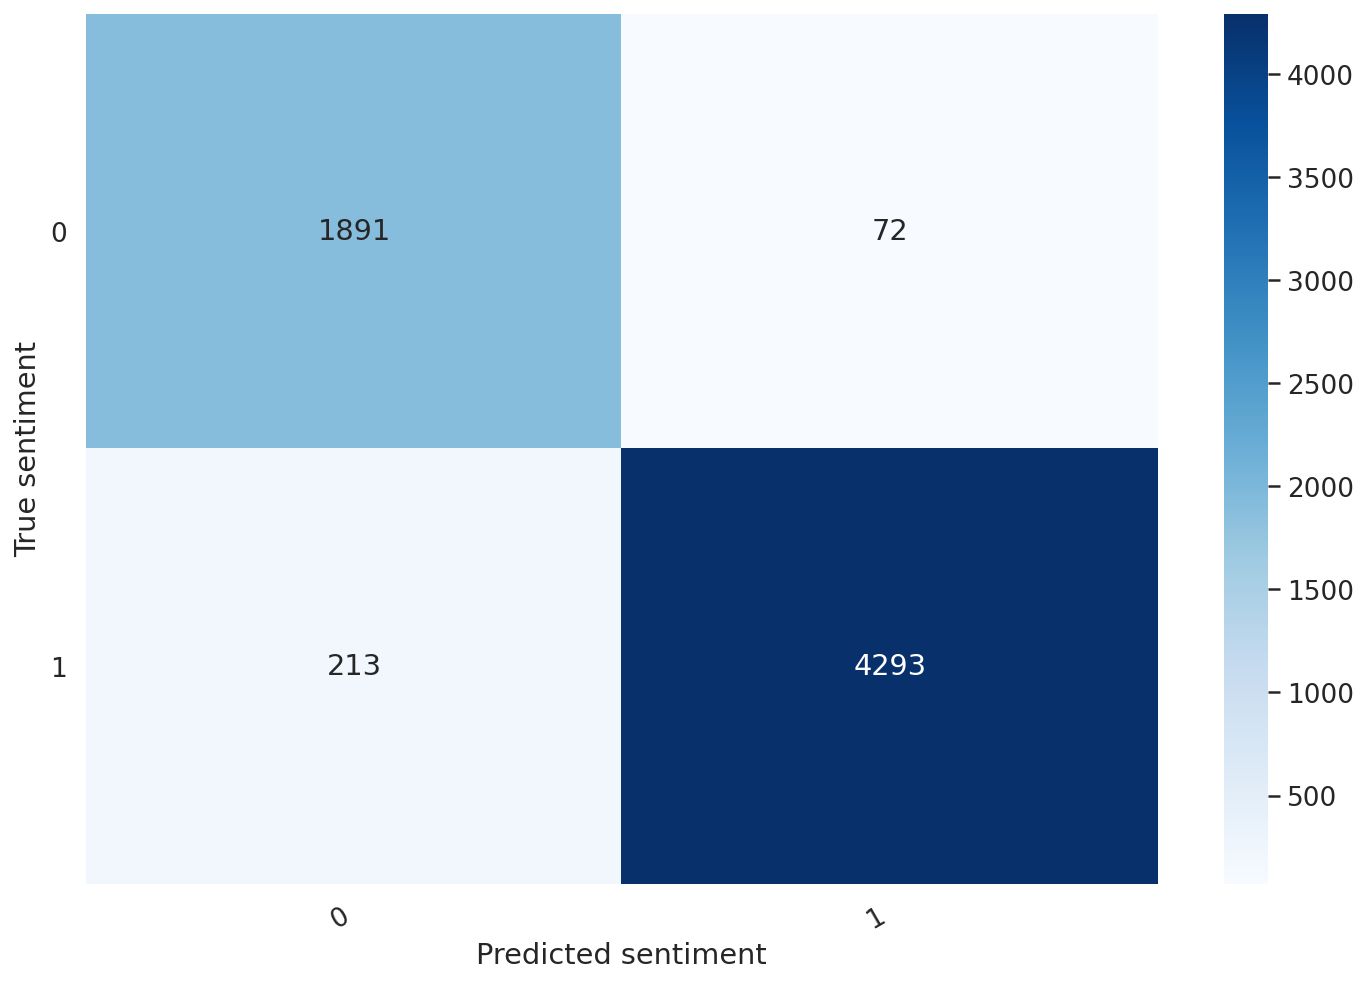

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_enc, predictions.tolist())
show_confusion_matrix(cm)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, predictions.tolist()))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1963
           1       0.98      0.95      0.97      4506

    accuracy                           0.96      6469
   macro avg       0.94      0.96      0.95      6469
weighted avg       0.96      0.96      0.96      6469



In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, predictions.tolist())
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.9580255702534166


### **Hybrid**

In [ ]:
from sklearn.utils import shuffle

X_rusros_enc, y_rusros_enc, _=  overAndunder(X_train_enc,y_train_enc)
X_rusros_enc, y_rusros_enc = shuffle(X_rusros_enc, y_rusros_enc, random_state=0)

In [ ]:
BATCH_SIZE = 16
MAX_LEN = 256
EPOCHS = 5
train_data_loader = create_data_loader(X_rusros_enc, y_rusros_enc, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val_enc.values,y_val_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test_enc.values,y_test_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
BATCH_SIZE = 16
MAX_LEN = 256
EPOCHS = 5
train_data_loader = create_data_loader(X_rusros_enc, y_rusros_enc, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val_enc.values,y_val_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test_enc.values,y_test_enc.values, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
model = SentimentClassifierBert(2)
model = model.to(device)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
optimizer, scheduler, loss_fn = get_training_modules(model, len(train_data_loader)*EPOCHS)


In [ ]:
run_training(model,train_data_loader, len(X_rusros_enc), val_data_loader, len(X_val_enc), BATCH_SIZE, PRE_TRAINED_MODEL_NAME, EPOCHS, loss_fn, optimizer, device, scheduler, curr_epoc=0)

  0%|          | 0/1296 [00:00<?, ?it/s]

Epoch 1/5
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a

Train loss 0.1788573334615873


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9550, device='cuda:0', dtype=torch.float64)
Val   loss 0.14666803923067578 accuracy 0.954975845410628



  0%|          | 0/1296 [00:00<?, ?it/s]

Epoch 2/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.07738314925924818


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9610, device='cuda:0', dtype=torch.float64)
Val   loss 0.16206370891656807 accuracy 0.9609661835748792



  0%|          | 0/1296 [00:00<?, ?it/s]

Epoch 3/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss 0.02941897045941656


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9569, device='cuda:0', dtype=torch.float64)
Val   loss 0.2407776839172584 accuracy 0.9569082125603865

Epoch 4/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.011837028765549006


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9559, device='cuda:0', dtype=torch.float64)
Val   loss 0.3060583197628507 accuracy 0.9559420289855072

Epoch 5/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.006213322763072444


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

tensor(0.9617, device='cuda:0', dtype=torch.float64)
Val   loss 0.28317129277112135 accuracy 0.9617391304347825



  0%|          | 0/1296 [00:00<?, ?it/s]

Epoch 6/5
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.0027625937958604212


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

tensor(0.9617, device='cuda:0', dtype=torch.float64)
Val   loss 0.28317129277112135 accuracy 0.9617391304347825



In [ ]:
torch.save(model, "/content/drive/MyDrive/yelp/model_hybrid/last/model_last")

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/yelp/model_hybrid/last/model_last_state_dict")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
model = SentimentClassifierBert(2)
model = model.to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/yelp/model_hybrid/last/model_last_state_dict"))
model.eval()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

SentimentClassifierBert(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(28996, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768,

In [ ]:
eval_model(model, test_data_loader, loss_fn, device, len(X_test_enc),)

  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument

tensor(0.9604, device='cuda:0', dtype=torch.float64)


(tensor(0.9604, device='cuda:0', dtype=torch.float64), 0.2860154224433458)

In [ ]:
review_texts, predictions, prediction_probs, real_values=get_predictions(model, test_data_loader)


  0%|          | 0/405 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly tr

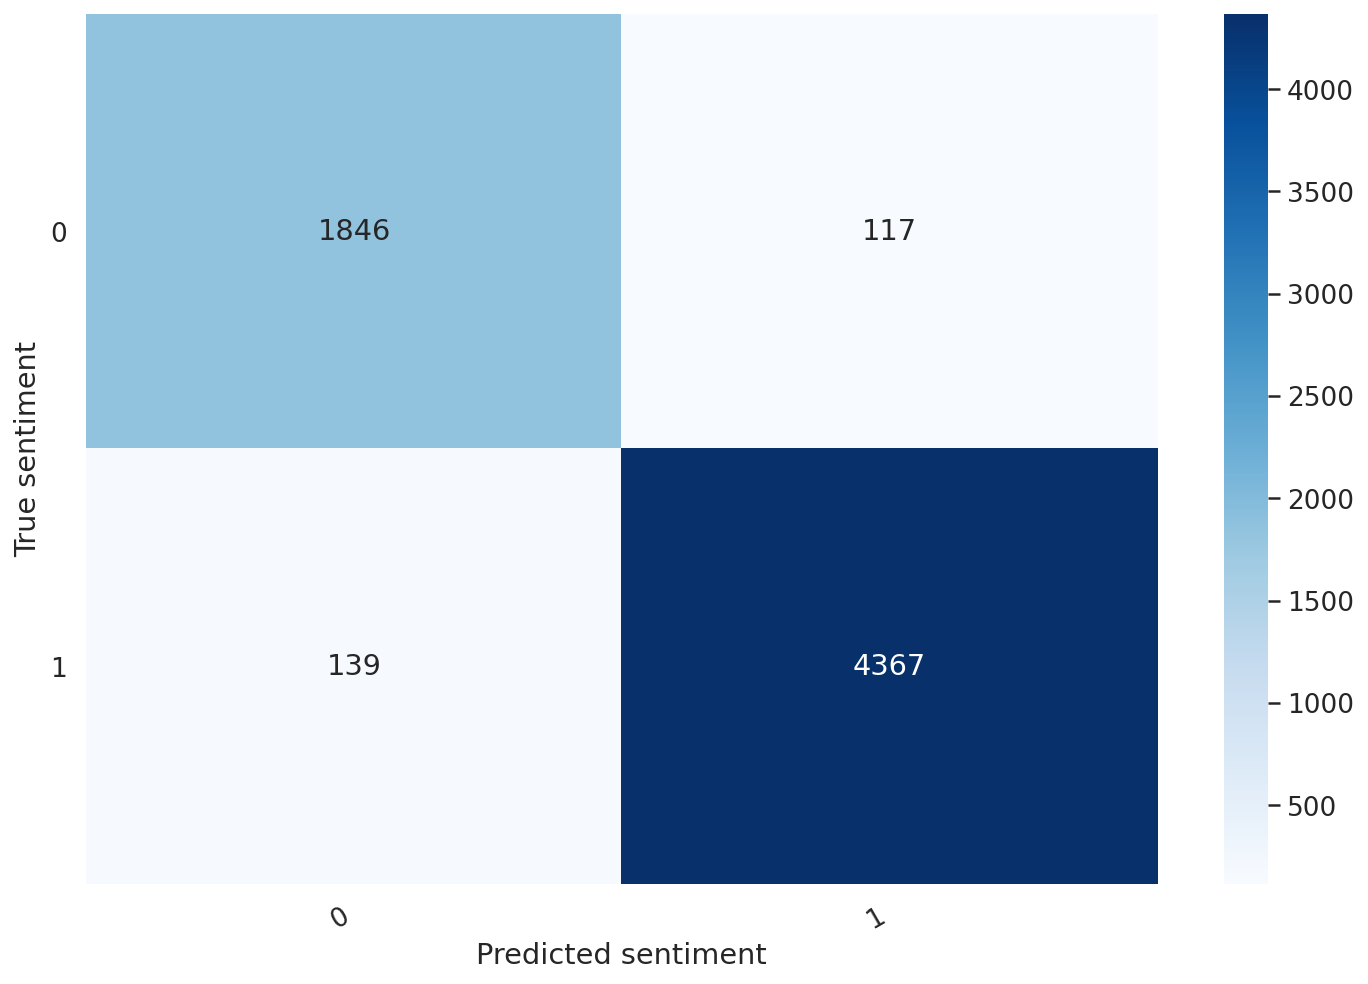

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_enc, predictions.tolist())
show_confusion_matrix(cm)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_enc, predictions.tolist()))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1963
           1       0.97      0.97      0.97      4506

    accuracy                           0.96      6469
   macro avg       0.95      0.95      0.95      6469
weighted avg       0.96      0.96      0.96      6469



In [ ]:
a = y_pred > 0.5

print(classification_report(y_test_enc.values,a.astype(int)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1945
           1       0.93      0.96      0.94      4510

    accuracy                           0.92      6455
   macro avg       0.91      0.89      0.90      6455
weighted avg       0.92      0.92      0.92      6455



In [ ]:

fpr, tpr, thresholds = metrics.roc_curve(y_test_enc, predictions.tolist())
print("Auc result : ", metrics.auc(fpr, tpr))

Auc result :  0.9547747962246071


# **Bert Oversampling explainability**

**be sure u load the oversampling bert model**


In [ ]:
review_texts, predictions, prediction_probs, real_values=get_predictions(model, test_data_loader)

In [ ]:

# build an explainer using a token masker
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
imdb_train = nlp.load_dataset("imdb")["train"]
shap_values = explainer(imdb_train[:10], fixed_context=1)

In [ ]:
a = []
i = 0
for x in test_data_loader:
  a.append(x["review_text"])
  i +=1
  if i == 5:
    break
a = [item for sublist in a for item in sublist]

# explain the model's predictions on IMDB reviews
explainer = shap.Explainer(f, tokenizer)

shap_values = explainer(a, fixed_context=1)

### **TP visualization**

In [ ]:
shap.plots.text(shap_values[35])


In [ ]:
shap.plots.text(shap_values[79])


### **TN visualization**

In [ ]:
shap.plots.text(shap_values[20])


In [ ]:
shap.plots.text(shap_values[30])


## **get the FP FN examples**

In [ ]:
test_result_dic = {"review_texts": review_texts,
                  "predictions": predictions.tolist(),
                   "real_values": real_values.tolist()}

test_df = pd.DataFrame(test_result_dic)
atest_df.head()

,review_texts,predictions,real_values
0,My co-worker suggested to try Kumare. I did. I...,1,0
1,Since they introduce those self ordering machi...,0,0
2,really fresh and yummy sashimi and sushi for v...,1,1
3,This place is super adorable and so delicious!...,1,1
4,I'm so glad Yelp recommend this place to me wh...,1,1


In [ ]:
false_negative_df = test_df[(test_df["predictions"] == 0) & (test_df["real_values"] == 1)]
false_positive_df = test_df[(test_df["predictions"] == 1) & (test_df["real_values"] == 0)]

fn_shap_values = explainer(false_negative_df["review_texts"].head(20), fixed_context=1)
fp_shap_values = explainer(false_positive_df["review_texts"].head(20), fixed_context=1)

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or us

### **FN examples**

In [ ]:
shap.plots.text(fn_shap_values[9])

In [ ]:
shap.plots.text(fn_shap_values[5])

In [ ]:
shap.plots.bar(shap_values.abs.max(0))


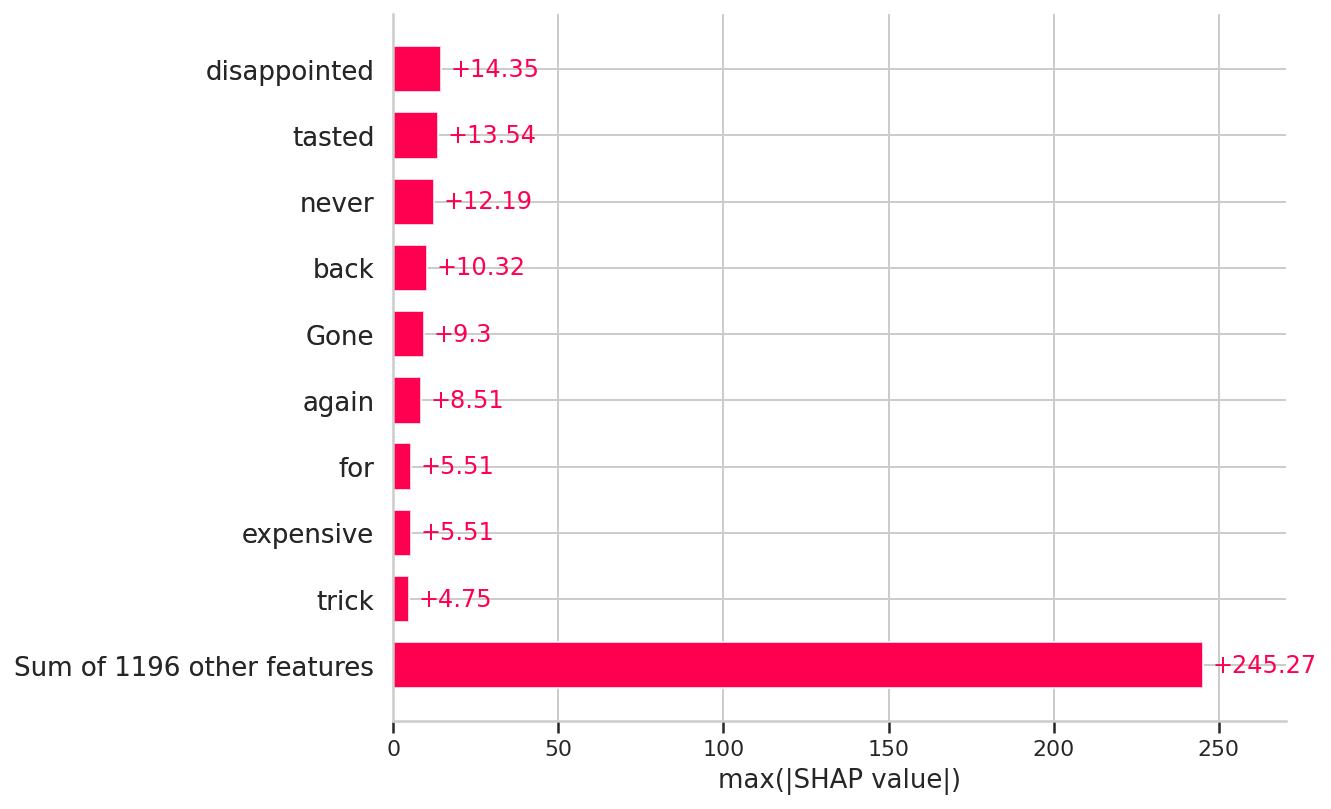

In [ ]:
shap.plots.bar(fn_shap_values.abs.max(0))


### **FP examples**

In [ ]:
shap.plots.text(fp_shap_values[10])

In [ ]:
shap.plots.text(fp_shap_values[12])

In [ ]:
shap.plots.text(fp_shap_values[19])

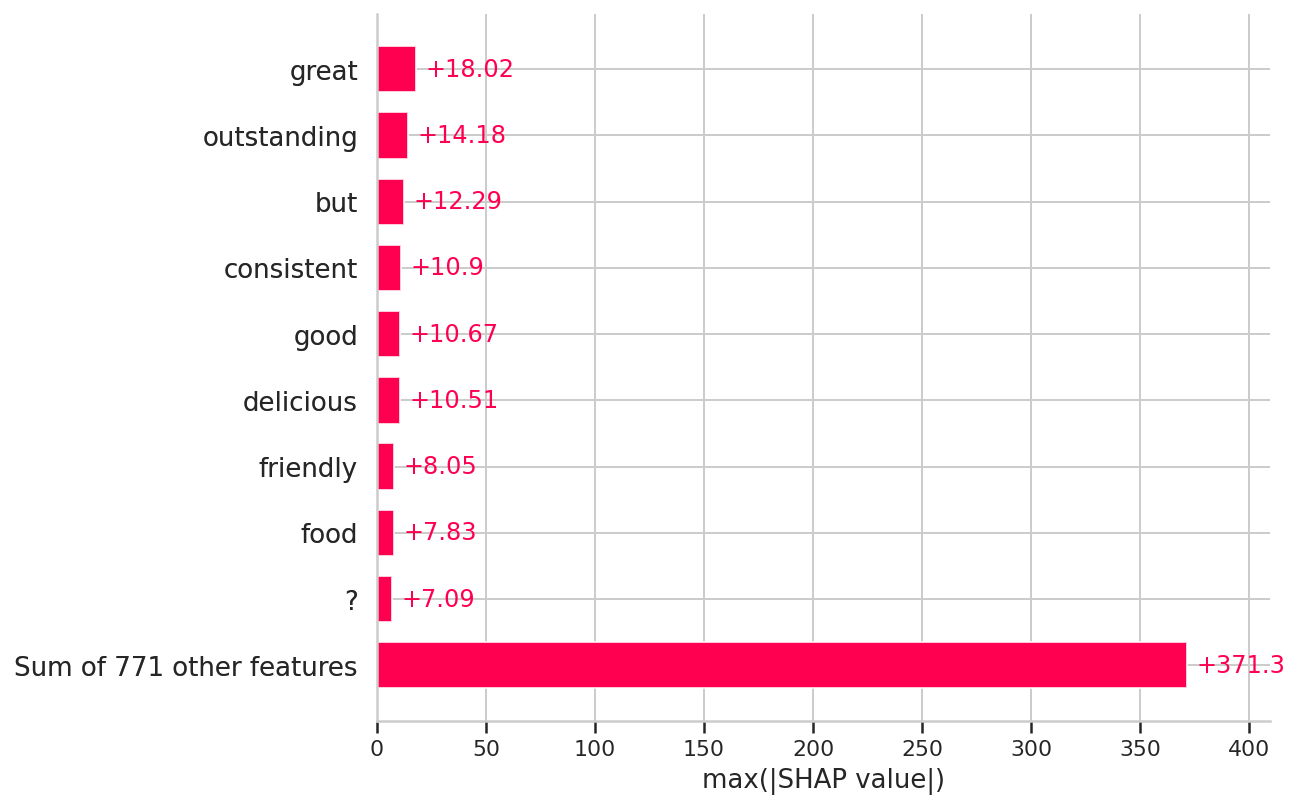

In [ ]:
shap.plots.bar(fp_shap_values.abs.max(0))
